In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
df = pd.read_excel('../data/raw/sales.xlsx')
df.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [4]:
df_no_missing_CustomerId = df.copy()
df_no_missing_CustomerId = df_no_missing_CustomerId.dropna(subset=['CustomerId'])
df_no_missing_CustomerId.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [5]:
df_no_duplicate = df_no_missing_CustomerId.copy()

df_no_duplicate = df_no_duplicate.drop_duplicates()

df_no_duplicate.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [6]:
df_no_missing_price = df_no_duplicate.copy()

df_no_missing_price = df_no_missing_price[df_no_missing_price['UnitPrice'] > 0]

df_no_missing_price.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [7]:
a = df_no_missing_price.copy()
a.drop_duplicates(['InvoiceNumber'], inplace=True)
b = a[a['Quantity'] <= 0].copy()
percentage_cancelled_orders = np.round((b['Quantity'].count() / a['Quantity'].count()) * 100)

In [8]:
df_cancelled = df[df['InvoiceNumber'].astype(str).str.startswith('C')]
top_cancelling_customers = (
    df_cancelled.groupby('CustomerId')['InvoiceNumber'].nunique()
    .reset_index(name='CanceledCount')
    .sort_values(['CanceledCount', 'CustomerId'], ascending=[False, True])
    .head(5)['CustomerId']
    .astype(int).astype(str)
    .tolist()
)

In [9]:
df_no_canceled_invoice = df_no_missing_price.copy()
df_no_canceled_invoice = df_no_canceled_invoice[~df_no_canceled_invoice['InvoiceNumber'].astype(str).str.startswith('C')]
df_no_canceled_invoice.head()

,InvoiceNumber,ProductCode,ProductName,Quantity,InvoiceDate,UnitPrice,CustomerId,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [11]:
remaining_invoices = df_no_canceled_invoice.InvoiceNumber.drop_duplicates()

In [15]:
number_of_orders = df.InvoiceNumber.unique().size

In [16]:
window_period = (min(df.InvoiceDate), max(df.InvoiceDate))

C:\Users\RayanGostar\AppData\Local\Temp\ipykernel_4460\2899605804.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(day_totals.index, fontsize=15)


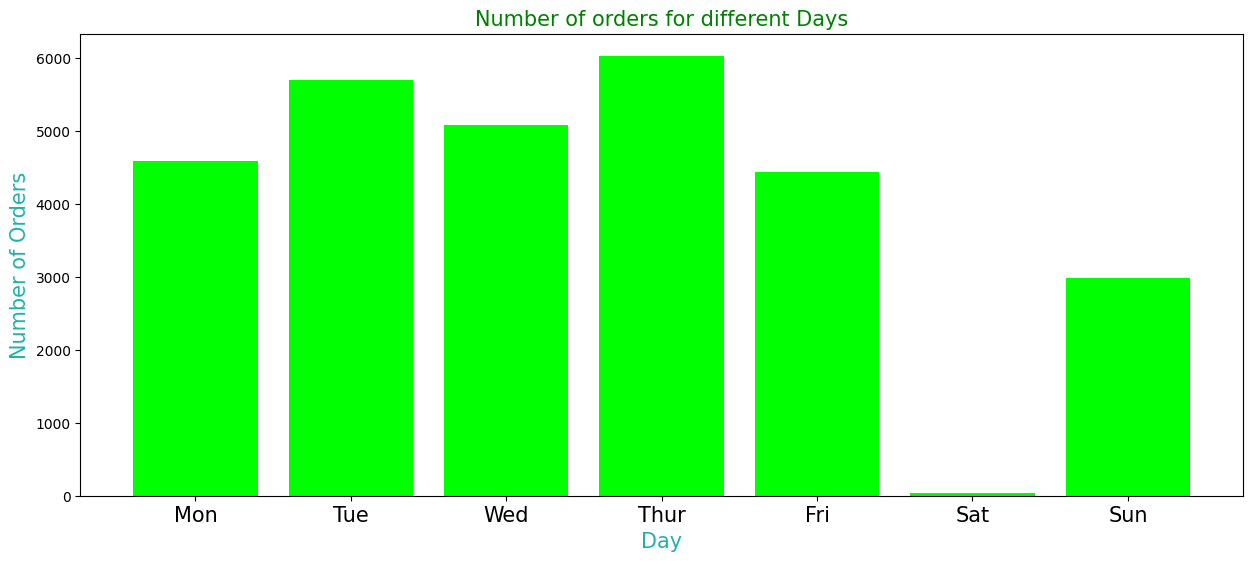

In [17]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
def to_day(date):
    day = date.day_name()
    if day == 'Sunday':
        return 'Sun'
    if day== 'Monday':
        return 'Mon'
    if day == 'Tuesday':
        return 'Tue'
    if day == 'Wednesday':
        return 'Wed'
    if day == 'Thursday':
        return 'Thur'
    if day == 'Friday':
        return 'Fri'
    if day == 'Saturday':
        return 'Sat'
df['day'] = df['InvoiceDate'].apply(to_day)
day_totals = df.groupby('day')['InvoiceNumber'].nunique()
day_order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
day_totals = day_totals.reindex(day_order)
fig1, ax1 = plt.subplots(figsize=(15, 6))
ax1.bar(day_totals.index, day_totals.values, color='lime')
ax1.set_xticklabels(day_totals.index, fontsize=15)
ax1.set_ylabel('Number of Orders', color='lightseagreen', fontsize=15)
ax1.set_xlabel('Day',color='lightseagreen' ,fontsize=15)
ax1.set_title('Number of orders for different Days', fontsize=15, color='green');

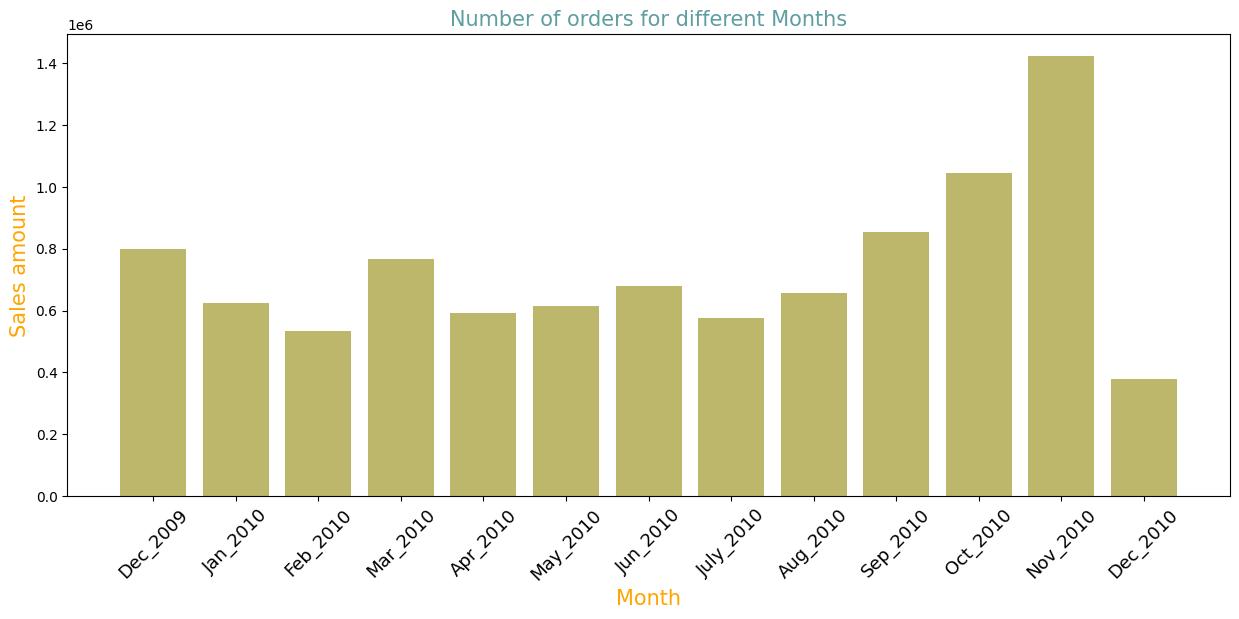

In [18]:
df['total'] = df['UnitPrice'] * df['Quantity']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['month_year'] = df['InvoiceDate'].dt.to_period('M').dt.to_timestamp()
df_group = df.groupby("month_year")['total'].sum().sort_index()
labels = []
for date in df_group.index:
    if date.month == 7:
        label = f'July_{date.year}'
    else:
        label = date.strftime('%b_%Y')
    labels.append(label)
fig2, ax2 = plt.subplots(figsize=(15, 6))
ax2.bar(labels, df_group.values, color='darkkhaki')
ax2.set_xlabel('Month', fontsize=15, color='orange')
ax2.set_ylabel('Sales amount', fontsize=15, color='orange')
ax2.set_title('Number of orders for different Months', color='cadetblue', fontsize=15)
ax2.tick_params(axis='x', labelsize=13, rotation=45)

In [21]:
df = df[df['Country'] != 'United Kingdom']
df['Total'] = df['UnitPrice'] * df['Quantity']
df_group = df.groupby(['Country']).agg({
    'CustomerId' : pd.Series.nunique,
    'Total' : 'sum'
})
Q1_Total = df_group['Total'].quantile(.75)
Q1_CustomerId = df_group['CustomerId'].quantile(.75)
def divide(row):
    if row['Total'] > Q1_Total and row['CustomerId'] > Q1_CustomerId:
        return  'red'
    if row['Total'] < Q1_Total and row['CustomerId'] > Q1_CustomerId:
        return  'blue'
    if row['Total'] > Q1_Total and row['CustomerId'] < Q1_CustomerId:
        return 'green'
    if row['Total'] < Q1_Total and row['CustomerId'] < Q1_CustomerId:
        return 'cyan'
df_group['color'] = df_group.apply(divide, axis=1)

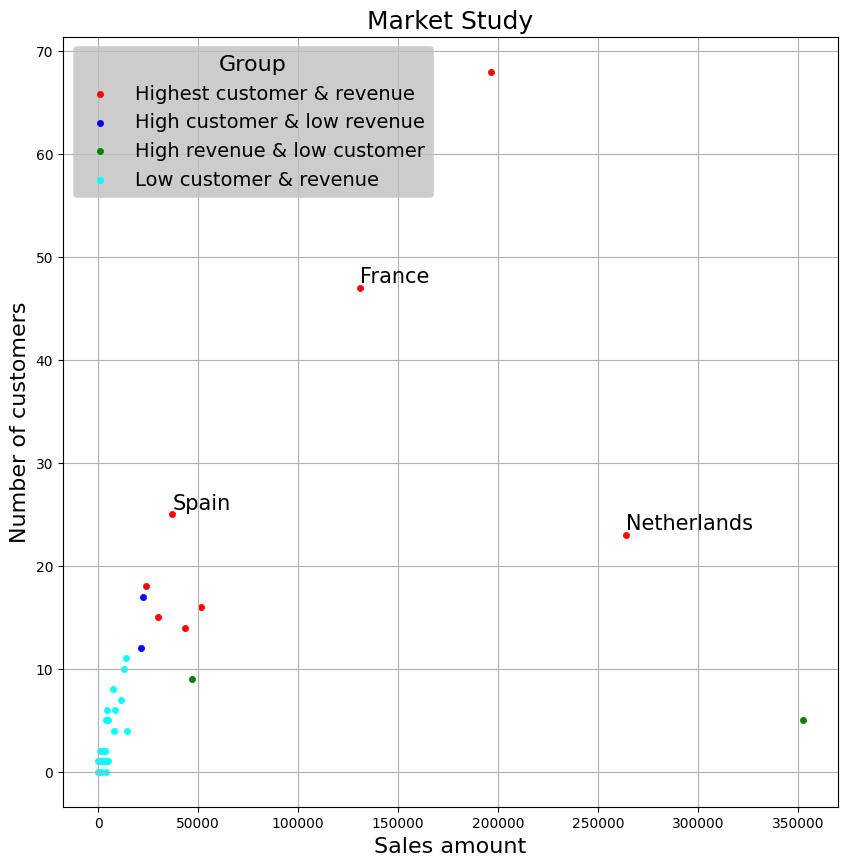

In [ ]:
fig , ax = plt.subplots(figsize=(10, 10))
plt.style.use('fivethirtyeight')
df_group[df_group.color == 'red'].plot(kind='scatter', ax=ax, x='Total', y='CustomerId', color='red', label='Highest customer & revenue')
df_group[df_group.color == 'blue'].plot(kind='scatter', ax=ax, x='Total', y='CustomerId', color='blue', label='High customer & low revenue')
df_group[df_group.color == 'green'].plot(kind='scatter', ax=ax, x='Total', y='CustomerId', color='green', label='High revenue & low customer')
df_group[df_group.color == 'cyan'].plot(kind='scatter', ax=ax, x='Total', y='CustomerId', color='cyan', label='Low customer & revenue')

x_val = df_group['Total'][df_group.index == 'France'].iloc[0]
y_val = df_group['CustomerId'][df_group.index == 'France'].iloc[0] + 0.5
x_val_1 = df_group['Total'][df_group.index == 'Netherlands'].iloc[0]
y_val_1 = df_group['CustomerId'][df_group.index == 'Netherlands'].iloc[0] + 0.5
x_val_2 = df_group['Total'][df_group.index == 'Spain'].iloc[0]
y_val_2 = df_group['CustomerId'][df_group.index == 'Spain'].iloc[0] + 0.5
ax.text(x_val, y_val, 'France', fontsize=15)
ax.text(x_val_1, y_val_1, 'Netherlands', fontsize=15)
ax.text(x_val_2, y_val_2, 'Spain', fontsize=15)
ax.set_title('Market Study', fontsize=18);
ax.set_ylabel('Number of customers', fontsize=16)
ax.set_xlabel('Sales amount', fontsize=16)
legend = ax.legend(title='Group', frameon=True, title_fontsize=16, facecolor='silver', fontsize=14);

In [25]:
df = df_no_canceled_invoice.copy()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [26]:
last_day = df['InvoiceDate'].sort_values().iloc[-1] + datetime.timedelta(days=1)
last_day

Timestamp('2010-12-10 20:01:00')

In [27]:
recency = df.groupby('CustomerId')['InvoiceDate'].max().apply(lambda x: (last_day - x).days)
df_customer_segments = pd.DataFrame({'CustomerId': recency.index, 'Recency': recency.values})
df_customer_segments.head()

,CustomerId,Recency
0,12346.0,165
1,12347.0,3
2,12348.0,74
3,12349.0,43
4,12351.0,11


In [28]:
df_customer_segments['Frequency'] = df.groupby(['CustomerId'])['InvoiceNumber'].nunique().values
df_customer_segments.head()

,CustomerId,Recency,Frequency
0,12346.0,165,11
1,12347.0,3,2
2,12348.0,74,1
3,12349.0,43,3
4,12351.0,11,1


In [29]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df_customer_segments['MonetaryValue'] = df.groupby('CustomerId')['TotalPrice'].sum().values
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue
0,12346.0,165,11,372.86
1,12347.0,3,2,1323.32
2,12348.0,74,1,222.16
3,12349.0,43,3,2671.14
4,12351.0,11,1,300.93


In [30]:
def get_quartile(arr):
    qu = np.quantile(arr, [0.25, 0.5, 0.75])
    output = []
    for value in arr:
        if value <= qu[0]:
            output.append(1)
        elif value > qu[0] and value <= qu[1]:
            output.append(2)
        elif value > qu[1] and value <= qu[2]:
            output.append(3)
        elif value > qu[2]:
            output.append(4)
    return output

In [31]:
df_customer_segments['R_quartile'] = get_quartile(df_customer_segments['Recency'])
df_customer_segments['F_quartile'] = get_quartile(df_customer_segments['Frequency'])
df_customer_segments['M_quartile'] = get_quartile(df_customer_segments['MonetaryValue'])
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile
0,12346.0,165,11,372.86,4,4,2
1,12347.0,3,2,1323.32,1,2,3
2,12348.0,74,1,222.16,3,1,1
3,12349.0,43,3,2671.14,2,3,4
4,12351.0,11,1,300.93,1,1,1


In [32]:
df_customer_segments['RFM'] = (df_customer_segments['R_quartile'].astype(str) +
                               df_customer_segments['F_quartile'].astype(str) +
                               df_customer_segments['M_quartile'].astype(str)).astype(int)
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM
0,12346.0,165,11,372.86,4,4,2,442
1,12347.0,3,2,1323.32,1,2,3,123
2,12348.0,74,1,222.16,3,1,1,311
3,12349.0,43,3,2671.14,2,3,4,234
4,12351.0,11,1,300.93,1,1,1,111


In [33]:
def group_rfm(input):
    output = []
    for i in input:
        if i == 144:
            output.append('Best')
        elif i == 344:
            output.append('AlmostLost')
        elif i == 444:
            output.append('LostBigSpenders')
        elif i == 441:
            output.append('LostCheap')
        elif str(i)[1] == '4':
            output.append('Loyal')
        elif str(i)[2] == '4':
            output.append('BigSpenders')
        else:
            output.append('Normal')
    return output

In [34]:
df_customer_segments['Segment'] = group_rfm(df_customer_segments['RFM'])
df_customer_segments.head()

,CustomerId,Recency,Frequency,MonetaryValue,R_quartile,F_quartile,M_quartile,RFM,Segment
0,12346.0,165,11,372.86,4,4,2,442,Loyal
1,12347.0,3,2,1323.32,1,2,3,123,Normal
2,12348.0,74,1,222.16,3,1,1,311,Normal
3,12349.0,43,3,2671.14,2,3,4,234,BigSpenders
4,12351.0,11,1,300.93,1,1,1,111,Normal


In [36]:
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year
df['final_y'] = pd.to_datetime(df[['year','month']].assign(day=1))

In [37]:
df[['final_y']].head(10)

,final_y
0,2009-12-01
1,2009-12-01
2,2009-12-01
3,2009-12-01
4,2009-12-01
5,2009-12-01
6,2009-12-01
7,2009-12-01
8,2009-12-01
9,2009-12-01


In [38]:
df['min_purchase_date'] = df.groupby('CustomerId')['final_y'].transform('min')

def month_diff(d1, d2):
    return (d1.dt.year - d2.dt.year) * 12 + (d1.dt.month - d2.dt.month) + 1

df['final_x'] = month_diff(df['final_y'], df['min_purchase_date'])
grouped = df.groupby(['min_purchase_date', 'final_x'])['CustomerId'].nunique().reset_index()
final_df = grouped.pivot(index='min_purchase_date', columns='final_x', values='CustomerId')
cohort_size = final_df.iloc[:, 0] 
final_df = final_df.divide(cohort_size, axis=0) * 100 
final_df.index = final_df.index.strftime("%Y-%m-%d")

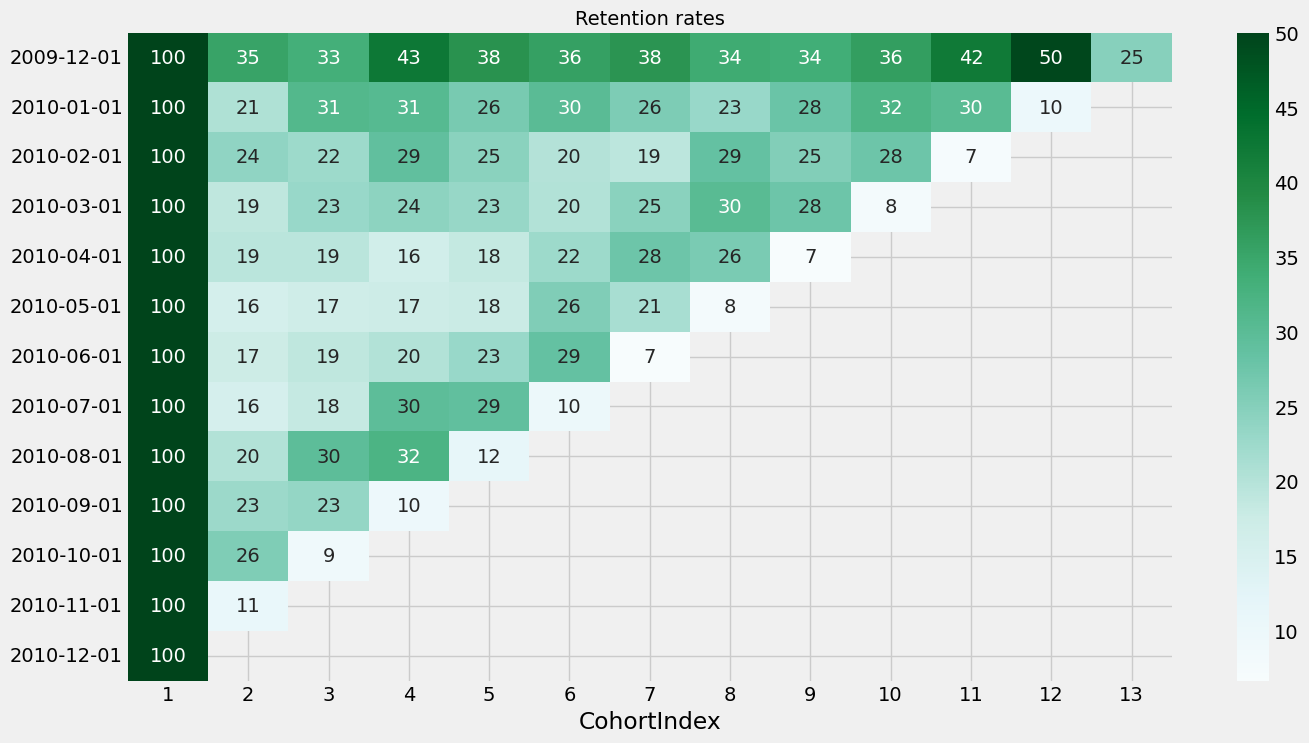

In [39]:
fig, ax = plt.subplots(figsize=(15, 8)) 
sns.heatmap(final_df, annot=True, fmt=".0f", cmap="BuGn", vmax=50, ax=ax) 
ax.set_title("Retention rates", fontsize=14)
ax.set_xlabel("CohortIndex")
ax.set_ylabel("")
plt.show()